## Harry Potter Movie Analysis

Alice Ding, Shoshana Farber, Christian Uriostegui

### Overview

Using [this](https://www.kaggle.com/datasets/maricinnamon/harry-potter-movies-dataset) collection of .csvs on Kaggle that has information from all eight Harry Potter movies, we plan on creating a character relationship network to analyze the strength between these connections by finding how many scenes each character shares with another. We will also be processing the dialogue to extract common themes and sentiment. 

For this project, we will be focusing on the `Dialogue.csv` file for most of this analysis, however we will be pulling information from several of the other files as well as complementary data.

### Importing the Data

To start, we've uploaded the data into our GitHub and will be pulling it in using pandas.

In [47]:
import pandas as pd

dialogue = pd.read_csv('https://github.com/addsding/cuny-data620/raw/main/final_proj/Harry_Potter_Movies/Dialogue.csv', encoding = 'ISO-8859-1')
dialogue.head()

Dialogue ID  Chapter ID  Place ID  Character ID  \
0            1           1         8             4   
1            2           1         8             7   
2            3           1         8             4   
3            4           1         8             7   
4            5           1         8             4   

                                            Dialogue  
0  I should have known that you would be here...P...  
1  Good evening, Professor Dumbledore. Are the ru...  
2   I'm afraid so, Professor. The good, and the bad.  
3                                       And the boy?  
4                            Hagrid is bringing him.

From what we can see above, the `Chapter ID`, `Place ID`, and `Character ID` use ints to represent places and characters respectively. For readability, we will replace these IDs with their actual values; these can be found in the `Chapters.csv`, `Places.csv`, and `Characters.csv` files. We'll also be including other data from a few of the other tables as well to create a fuller dataset.

In [48]:
chapters = pd.read_csv('https://github.com/addsding/cuny-data620/raw/main/final_proj/Harry_Potter_Movies/Chapters.csv', encoding = 'ISO-8859-1')
places = pd.read_csv('https://github.com/addsding/cuny-data620/raw/main/final_proj/Harry_Potter_Movies/Places.csv')
characters = pd.read_csv('https://github.com/addsding/cuny-data620/raw/main/final_proj/Harry_Potter_Movies/Characters.csv', encoding = 'ISO-8859-1')
movies = pd.read_csv('https://github.com/addsding/cuny-data620/raw/main/final_proj/Harry_Potter_Movies/Movies.csv')

dialogue = dialogue.merge(chapters, on='Chapter ID', how='left')
dialogue = dialogue.merge(characters, on='Character ID', how='left')
dialogue = dialogue.merge(places, on='Place ID', how='left')
dialogue = dialogue.merge(movies, on='Movie ID', how='left')
dialogue.head()

Dialogue ID  Chapter ID  Place ID  Character ID  \
0            1           1         8             4   
1            2           1         8             7   
2            3           1         8             4   
3            4           1         8             7   
4            5           1         8             4   

                                            Dialogue       Chapter Name  \
0  I should have known that you would be here...P...  Doorstep Delivery   
1  Good evening, Professor Dumbledore. Are the ru...  Doorstep Delivery   
2   I'm afraid so, Professor. The good, and the bad.  Doorstep Delivery   
3                                       And the boy?  Doorstep Delivery   
4                            Hagrid is bringing him.  Doorstep Delivery   

   Movie ID  Movie Chapter      Character Name Species  ... Patronus  \
0         1              1    Albus Dumbledore   Human  ...  Phoenix   
1         1              1  Minerva McGonagall   Human  ...      Cat   
2         1              1    Albus Dumbledore   Human  ...  Phoenix   
3         1              1  Minerva McGonagall   Human  ...      Cat   
4         1              1    Albus Dumbledore   Human  ...  Phoenix   

  Wand (Wood)         Wand (Core)      Place Name Place Category  \
0       Elder  Thestral Tail Hair  4 Privet Drive      Dwellings   
1         Fir  Dragon Heartstring  4 Privet Drive      Dwellings   
2       Elder  Thestral Tail Hair  4 Privet Drive      Dwellings   
3         Fir  Dragon Heartstring  4 Privet Drive      Dwellings   
4       Elder  Thestral Tail Hair  4 Privet Drive      Dwellings   

                                Movie Title Release Year Runtime  \
0  Harry Potter and the Philosopher's Stone         2001     152   
1  Harry Potter and the Philosopher's Stone         2001     152   
2  Harry Potter and the Philosopher's Stone         2001     152   
3  Harry Potter and the Philosopher's Stone         2001     152   
4  Harry Potter and the Philosopher's Stone         2001     152   

          Budget       Box Office  
0  $125,000,000   $1,002,000,000   
1  $125,000,000   $1,002,000,000   
2  $125,000,000   $1,002,000,000   
3  $125,000,000   $1,002,000,000   
4  $125,000,000   $1,002,000,000   

[5 rows x 22 columns]

We've appended all of the information now -- it looks like a very wide table now though. Let's select the most relevant fields and remove redundant/unnecessary ones.

In [49]:
final_dialogue = dialogue[['Dialogue ID', 'Movie Title', 'Chapter ID', 'Chapter Name', 'Place Name', 'Place Category', 'Character Name', 'House', 'Dialogue']]
final_dialogue = final_dialogue.rename(columns={'Dialogue ID': 'dialogue_id', 
                                                'Movie Title': 'movie_title', 
                                                'Chapter ID': 'chapter_id',
                                                'Chapter Name': 'chapter_name',
                                                'Place Name': 'place_name',
                                                'Place Category': 'place_category', 
                                                'Character Name': 'character_name', 
                                                'House': 'house', 
                                                'Dialogue': 'dialogue'})

final_dialogue.head()

dialogue_id                               movie_title  chapter_id  \
0            1  Harry Potter and the Philosopher's Stone           1   
1            2  Harry Potter and the Philosopher's Stone           1   
2            3  Harry Potter and the Philosopher's Stone           1   
3            4  Harry Potter and the Philosopher's Stone           1   
4            5  Harry Potter and the Philosopher's Stone           1   

        chapter_name      place_name place_category      character_name  \
0  Doorstep Delivery  4 Privet Drive      Dwellings    Albus Dumbledore   
1  Doorstep Delivery  4 Privet Drive      Dwellings  Minerva McGonagall   
2  Doorstep Delivery  4 Privet Drive      Dwellings    Albus Dumbledore   
3  Doorstep Delivery  4 Privet Drive      Dwellings  Minerva McGonagall   
4  Doorstep Delivery  4 Privet Drive      Dwellings    Albus Dumbledore   

        house                                           dialogue  
0  Gryffindor  I should have known that you would be here...P...  
1  Gryffindor  Good evening, Professor Dumbledore. Are the ru...  
2  Gryffindor   I'm afraid so, Professor. The good, and the bad.  
3  Gryffindor                                       And the boy?  
4  Gryffindor                            Hagrid is bringing him.

Our final dataframe is comprised of the following information:

- `dialogue_id`: ID of each line spoken by a character; primary key
- `movie_title`: Movie that this dialogue takes place in
- `chapter_id`: Chapter ID that this dialogue takes place in
- `chapter_name`: Chapter that this dialogue takes place in
- `place_name`: Where the character is located when speaking this dialogue
- `place_category`: Category of the place, can be:
    - Hogwarts
    - Dwellings
    - Other Magical Locations
    - Diagon Alley
    - Hogsmeade
- `character_name`: Character who said this dialogue
- `dialogue`: What the character said

What does this data look like?

### Exploration

How much dialogue happens in each movie?

In [50]:
final_dialogue['movie_title'].value_counts()

Harry Potter and the Order of the Phoenix      1157
Harry Potter and the Half-Blood Prince         1070
Harry Potter and the Deathly Hallows Part 1    1012
Harry Potter and the Chamber of Secrets         986
Harry Potter and the Philosopher's Stone        885
Harry Potter and the Prisoner of Azkaban        881
Harry Potter and the Goblet of Fire             741
Harry Potter and the Deathly Hallows Part 2     712
Name: movie_title, dtype: int64

Order of the Phoenix leads the charge at 1.1k lines of dialogue while Deathly Hallows Part 2 only has 712 -- very interesting range.

What about locations?

In [51]:
final_dialogue['place_category'].value_counts()

Hogwarts                   4504
Dwellings                  1408
Other Magical Locations     953
Diagon Alley                304
Hogsmeade                   275
Name: place_category, dtype: int64

In terms of categories of location, it's not surprising that Hogwarts has the most dialogue in terms of location; a majority of the books occur at the school. 

What do counts look like by character?

In [52]:
final_dialogue['character_name'].value_counts().head()

Harry Potter        1922
Ron Weasley          865
Hermione Granger     848
Albus Dumbledore     474
Rubeus Hagrid        228
Name: character_name, dtype: int64

For the top 5 characters, these aren't too surprising -- Harry having more than double the amount of lines as the next highest (Ron) is more extreme than we would've thought, but it otherwise it isn't too surprising. The top three are the main friend group with Dumbledore and Hagrid as close allies, so it makes sense that these characters would have the most dialogue.

Now that we have a sense of the data, we can get into network creation!

### Prepping the Data

We'll be counting a connection as a shared chapter and place between characters and we can use different values for the weights: either the count of scenes shared, or dialogue spoken between characters. For example, the first scene of the first movie is McGonagall and Dumbledore speaking to each other; this would count as one scene together and however much dialogue they shared, that would count as amount of lines spoken to one another.

To do this, we'll have to create a data frame with the following columns:

- `character1`: First character involved in a scene/place combo
- `character2`: Second character involved in a scene/place combo
- `scenes`: Shared scene count
- `dialogue`: Count of lines spoken between these characters

In [53]:
# Step 1: Group by chapter and place to get a list of characters involved in each interaction
by_chapter_place = final_dialogue[['chapter_id', 'place_name', 'character_name', 'dialogue_id']].groupby(['chapter_id', 'place_name', 'character_name']).nunique().reset_index()
by_chapter_place.rename(columns={'dialogue_id': 'dialogue', 'character_name': 'character1'}, inplace=True)

by_chapter_place.head(20)

chapter_id          place_name          character1  dialogue
0            1      4 Privet Drive    Albus Dumbledore         9
1            1      4 Privet Drive  Minerva McGonagall         5
2            1      4 Privet Drive       Rubeus Hagrid         2
3            2      4 Privet Drive      Dudley Dursley        11
4            2      4 Privet Drive        Harry Potter         5
5            2      4 Privet Drive                 Man         1
6            2      4 Privet Drive     Petunia Dursley         9
7            2      4 Privet Drive             Student         1
8            2      4 Privet Drive      Vernon Dursley         6
9            3      4 Privet Drive      Dudley Dursley         4
10           3      4 Privet Drive        Harry Potter         8
11           3      4 Privet Drive     Petunia Dursley         6
12           3      4 Privet Drive      Vernon Dursley        14
13           4     Hut-on-the-Rock      Dudley Dursley         2
14           4     Hut-on-the-Rock        Harry Potter        13
15           4     Hut-on-the-Rock     Petunia Dursley         2
16           4     Hut-on-the-Rock       Rubeus Hagrid        16
17           4     Hut-on-the-Rock      Vernon Dursley         5
18           5  The Leaky Cauldron                 Boy         1
19           5  The Leaky Cauldron              Goblin         1

From this, we would want to extract that from the first chapter, Dumbledore, McGonagall and Hagrid are connected with a scene weight of 1 and a dialogue weight of 9, 5, and 2 respectively for each character. To do this, we will first get a combination of chapter, place, and characters in that scene before then merging these two dataframes to get all of the information.

In [54]:
# Step 2: Create a dataframe with all unique combinations of chapter_id, and place_name involved
unique_combinations = pd.DataFrame(final_dialogue[['chapter_id', 'place_name']].drop_duplicates())
unique_combinations['key'] = 1  # use this as a dummy column for merging

unique_combinations.head()

chapter_id          place_name  key
0             1      4 Privet Drive    1
16            2      4 Privet Drive    1
49            3      4 Privet Drive    1
81            4     Hut-on-the-Rock    1
119           5  The Leaky Cauldron    1

In [55]:
# Step 3: Merge the two dataframes to combine the information
combined_df = pd.merge(unique_combinations, by_chapter_place, on=['chapter_id', 'place_name'], how='left') # merge both dataframes
combined_df = pd.merge(combined_df, by_chapter_place, on=['chapter_id', 'place_name'], how='left')
combined_df = combined_df[combined_df['character1_x'] != combined_df['character1_y']]  # exclude self-combinations
combined_df['scenes'] = combined_df.groupby(['chapter_id', 'place_name'])['character1_x'].transform('count')  # add scenes column
combined_df = combined_df.groupby(['chapter_id', 'place_name', 'character1_x', 'character1_y']).agg({'scenes': 'count', 'dialogue_x': 'sum'}).reset_index()
combined_df.rename(columns={'character1_x': 'character1', 'character1_y': 'character2', 'dialogue_x': 'dialogue'}, inplace=True)
combined_df = combined_df[['character1', 'character2', 'scenes', 'dialogue']]

combined_df.head()

character1          character2  scenes  dialogue
0    Albus Dumbledore  Minerva McGonagall       1         9
1    Albus Dumbledore       Rubeus Hagrid       1         9
2  Minerva McGonagall    Albus Dumbledore       1         5
3  Minerva McGonagall       Rubeus Hagrid       1         5
4       Rubeus Hagrid    Albus Dumbledore       1         2

Great! Last step is just to aggregate it so we get the summation of scenes and dialogue for each of the combinations.

In [56]:
final_df = combined_df.groupby(['character1', 'character2']).agg({'scenes': 'sum', 'dialogue': 'sum'}).reset_index()
final_df.head()

character1        character2  scenes  dialogue
0  Aberforth Dumbledore      Harry Potter       1        18
1  Aberforth Dumbledore  Hermione Granger       1        18
2  Aberforth Dumbledore       Ron Weasley       1        18
3         Alastor Moody  Albus Dumbledore       8        19
4         Alastor Moody  Barty Crouch Jr.       2        12

With this set up, we can now try making the graph!

### Network Creation

We'll start with just looking at the network by scene count among characters.

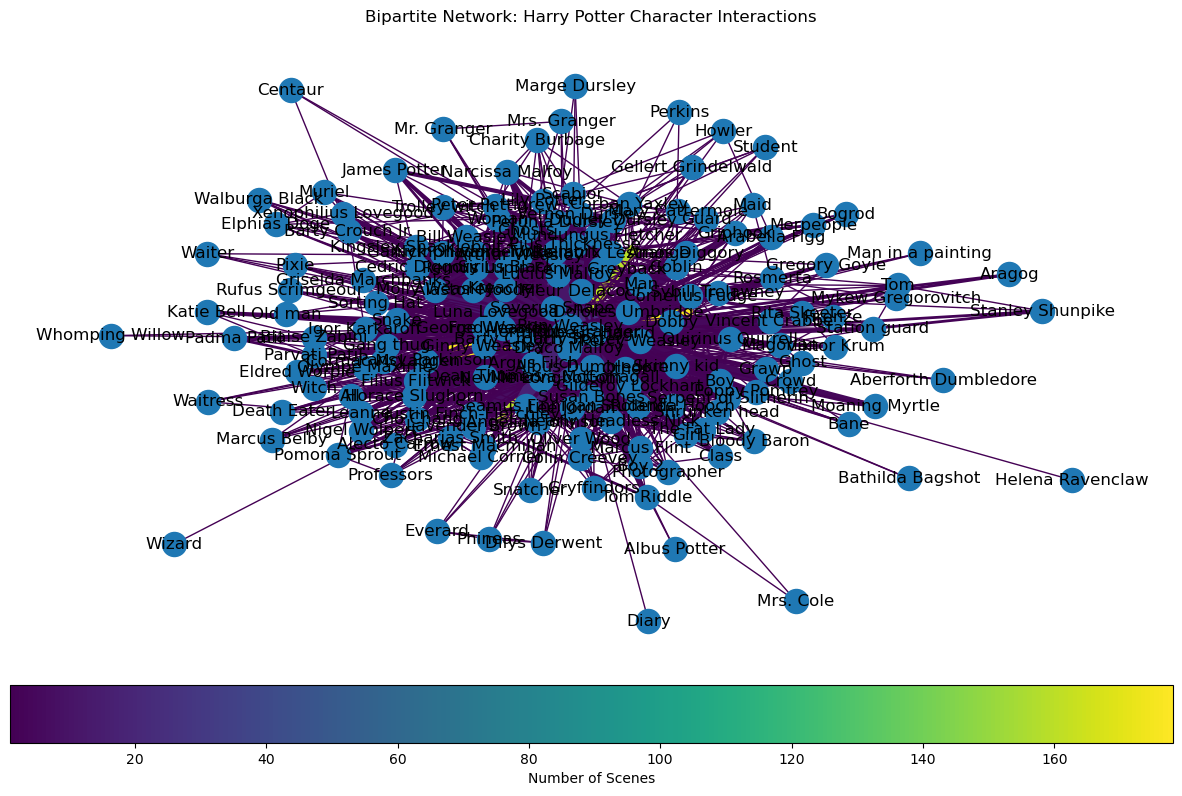

In [92]:
# Initialize the figure
fig, ax = plt.subplots(figsize=(15, 10))

# Create an empty bipartite graph
G = nx.Graph()

# Add nodes and edges to the grap

G.add_nodes_from(final_df['character1'], bipartite=0)  # character 1
G.add_nodes_from(final_df['character2'], bipartite=1)  # character 2
G.add_edges_from([(row['character1'], row['character2'], {'scenes': row['scenes']}) for _, row in final_df.iterrows()])  # Edge between characters

# Calculate edge weights for the new graph
weights_G = list(nx.get_edge_attributes(G, 'scenes').values())

# Create a spring layout for the graph
pos = nx.spring_layout(G, seed=2345)

# Draw the graph
nx.draw_networkx(G, pos, width=weights_G, edge_color=weights_G, with_labels=True)

# Set the title and remove axis
plt.title("Bipartite Network: Harry Potter Character Interactions")
plt.axis("off")

# Create a colorbar
norm = mpl.colors.Normalize(vmin=min(weights_G), vmax=max(weights_G))
cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=plt.cm.viridis), ax=ax, orientation='horizontal', pad=0.01)
cbar.set_label('Number of Scenes')


plt.show()


Very interesting to look at -- what if we tried using dialogue as weight?

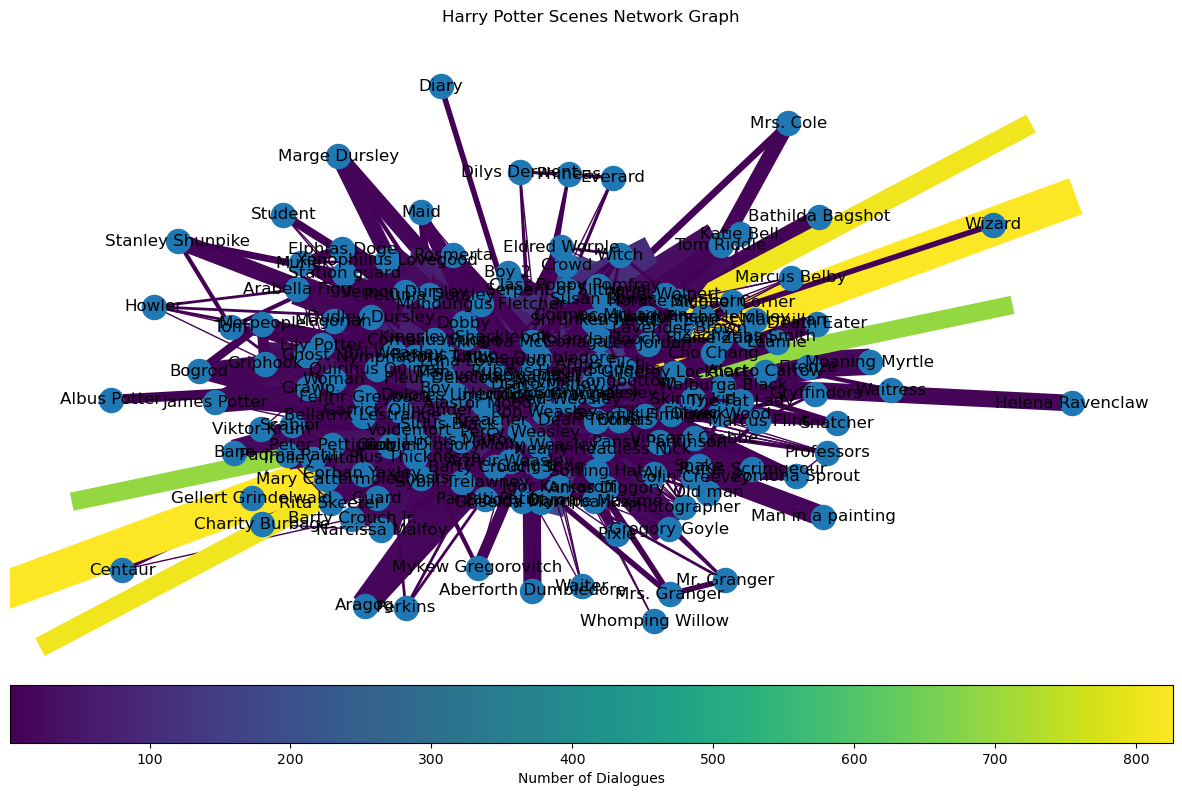

In [89]:
# Clear existing edges
G.clear_edges()

# Add edges with 'dialogue' as the attribute
G.add_edges_from([(row['character1'], row['character2'], {'dialogue': row['dialogue']}) for _, row in final_df.iterrows()])

weights_G = [edata['dialogue'] for f, t, edata in G.edges(data = True)]

fig, ax = plt.subplots(figsize=(15, 10))
pos = nx.spring_layout(G, seed = 11)
nx.draw_networkx(G, pos, width = weights_G, edge_color = weights_G, with_labels=True)
plt.title("Harry Potter Dialogue Network Graph")
plt.axis('off')

# Create a colorbar
norm = mpl.colors.Normalize(vmin=min(weights_G), vmax=max(weights_G))
cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=plt.cm.viridis), ax=ax, orientation='horizontal', pad=0.01)
cbar.set_label('Number of Dialogues')

plt.show()

Definitely a lot more going on -- let's try to clean these graphs up!

### Network Analysis

Looking at the different subsets created from our `final_dialogue` data frame, moving forward, it makes the sense to use the `by_chapter_place` dataframe (**see below**) for network analysis. The `final_df` dataframe used previously is not easily separated into nodes, edges and weight because there are two character columns (*'character1'*, *'character2'*). Having one column for the characters like we see in `by_chapter_place` will facilitate looking at projections and further manipulating the data.
<img src="by_chapter.png" title="by_chapter_place_df" width="400">
In this section, I will examine the characters that have scenes/chapters in common as well as dialogue. This will tell us which characters have the most presence in the movie, and measures the influence of their network. In addition, I will be performing and examining centrality measures. 

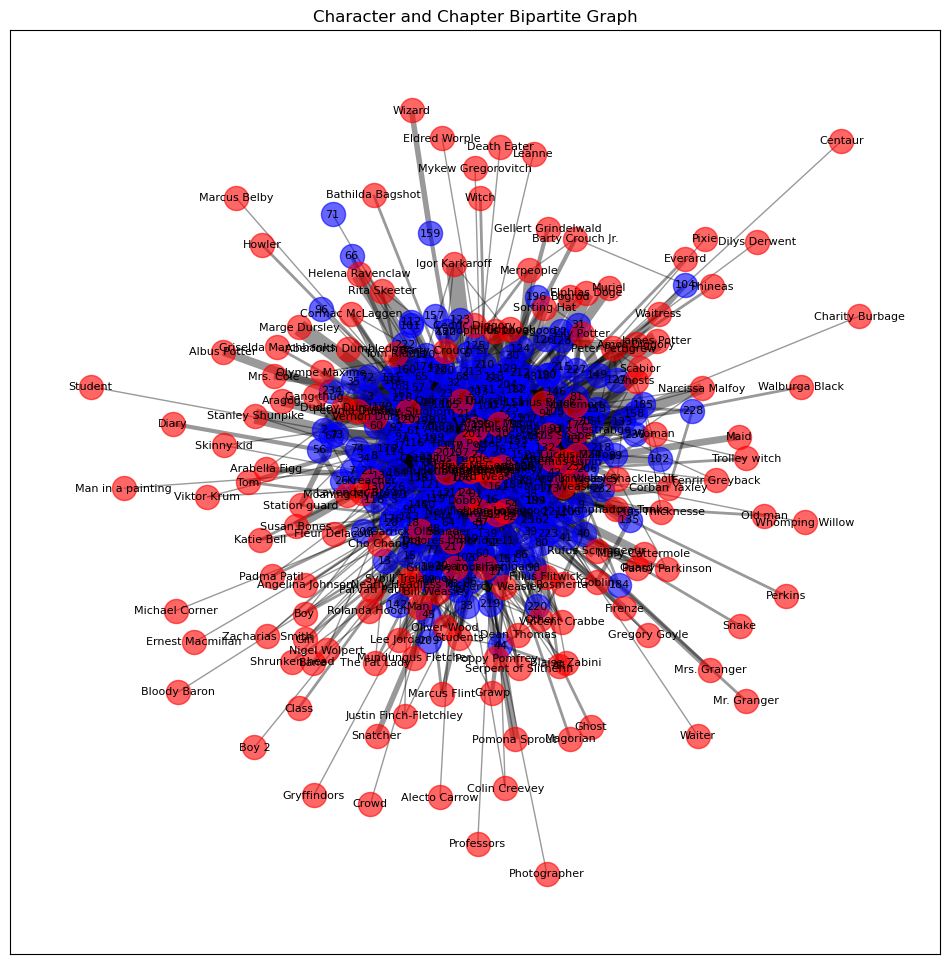

In [87]:
import networkx as nx
from networkx.algorithms import bipartite

# Create an empty graph
B = nx.Graph()

# Add nodes with the node attribute "bipartite"
B.add_nodes_from(by_chapter_place['chapter_id'].unique(), bipartite=0)
B.add_nodes_from(by_chapter_place['character1'].unique(), bipartite=1)

# Add edges only between nodes of opposite node sets
B.add_weighted_edges_from(
    [(row['character1'], row['chapter_id'], row['dialogue']) for idx, row in by_chapter_place.iterrows()]
)

# Calculate edge weights
weights = [edata['weight'] for f, t, edata in B.edges(data=True)]

# Separate by group
chapter_nodes = {n for n, d in B.nodes(data=True) if d["bipartite"]==0}
character_nodes = set(B) - chapter_nodes

# Create a spring layout for the bipartite graph B
pos_B = nx.spring_layout(B, seed = 629)

# Plot the bipartite graph using the spring layout with node labels
plt.figure(figsize=(12, 12))

# Draw nodes and edges separately in order to color nodes differently 
# based on the 'bipartite' attribute (0: chapters, 1: characters)
nx.draw_networkx_nodes(B, pos_B, nodelist=chapter_nodes, node_color='blue', node_size=300, alpha=0.6)
nx.draw_networkx_nodes(B, pos_B, nodelist=character_nodes, node_color='red', node_size=300, alpha=0.6)
nx.draw_networkx_edges(B, pos_B, width=weights, alpha=0.4)

# Draw the node labels
nx.draw_networkx_labels(B, pos_B, font_size=8)

plt.title("Character and Chapter Bipartite Graph")
plt.show()

Now that we created our bipartite graph object, we will perform the following functions and place them in a dataframe:
- **bipartite.projected_graph**: Stored in `C_pg`, this will create an edge if two characters share atleast a scene together. This look at the number of unique characters that a character has shared a scene with.
<br>*For ex: if character A has a unweighted projection degree of 40, it means they have shared a scene with atleast 40 unique characters.* 
- **bipartite.weighted_projected_graph**: Stored in `C_wpg`, this will create an edge that adds the total scenes that a character has shared with other characters. 
<br>*For ex: if Harry Potter has 2 scenes with Hermoine and 3 with Ron, Harry will have a weighted projection degree of 5.* 

In [93]:
# Project bipartite graph onto character nodes
C_pg = bipartite.projected_graph(B, character_nodes)

# Project bipartite graph onto character nodes keeping number of co-occurrences (i.e., shared chapters)
# The degree computed is weighted and counts the total number of shared chapters
C_wpg = bipartite.weighted_projected_graph(B, character_nodes)

# Initializing a list; this will hold a list of lists
# It will look like: [[name, # of friends, # of shared chapters], ...]
characters_chapters = []

for c in character_nodes:
    # For each character, append [name, # of connected characters, # of shared chapters] into characters_chapters
    characters_chapters.append([c, C_pg.degree(c), C_wpg.degree(c, weight = 'weight')])

# Create the dataframe with the data in characters_chapters
characters_df = pd.DataFrame(characters_chapters, columns = ['name', 'connected_characters', 'shared_chapters'])

# Output the newly made dataframe sorted by the number of connected characters and shared chapters
characters_df.sort_values(by = ['connected_characters', 'shared_chapters'], ascending = False)


name  connected_characters  shared_chapters
23         Harry Potter                   161             1173
89          Ron Weasley                   142              915
22     Hermione Granger                   140              867
117  Neville Longbottom                    86              313
152       Rubeus Hagrid                    74              270
..                  ...                   ...              ...
65         Albus Potter                     2                2
128     Whomping Willow                     2                2
163    Bathilda Bagshot                     2                2
40               Wizard                     1                1
42     Helena Ravenclaw                     1                1

[166 rows x 3 columns]

Looking back at the characters with the most dialogue overall (**see below**), we can see that four of them make an appearances here in the top five in this data frame: **Harry**, **Ron**, **Hermoine**, and **Hagrid**.
<img src="final_dialogue.png" title="by_chapter_place_df" width="400">
**Harry Potter** has had atleast a scene with 161 of the 166 characters in the films and a total of 1173 shared scenes with different charactors. It makes sense given that he is the main protagonist of the story. Similarly, because **Ron**, **Hermoine** and **Hagrid** are close alies, I expected them to be at the top of this list. I was surprised to see **Neville**, instead of **Dumbledore**. An explaination as to why he interacts with less unique characters could be because of Dumbledore's high status within the Hogwarts school and key events in the story.

In [137]:
characters_df.sort_values(by = ['connected_characters', 'shared_chapters'], ascending = False).head(30)

name  connected_characters  shared_chapters
23           Harry Potter                   161             1173
89            Ron Weasley                   142              915
22       Hermione Granger                   140              867
117    Neville Longbottom                    86              313
152         Rubeus Hagrid                    74              270
99           Draco Malfoy                    73              244
80           Fred Weasley                    71              231
154         Severus Snape                    71              210
136        George Weasley                    69              215
97       Albus Dumbledore                    68              295
32          Ginny Weasley                    68              205
82     Minerva McGonagall                    64              231
104             Voldemort                    60              155
157       Seamus Finnigan                    59              186
57         Arthur Weasley                    54              136
66          Luna Lovegood                    53              128
113           Remus Lupin                    49              146
96          Percy Weasley                    41               73
144              Students                    40              109
125           Argus Filch                    40               95
124      Dolores Umbridge                    40               69
139         Alastor Moody                    39              109
0                   Other                    37               92
41        Cornelius Fudge                    35               78
67          Lucius Malfoy                    35               76
114           Dean Thomas                    35               71
100   Bellatrix Lestrange                    33               76
46          Molly Weasley                    32               93
36   Kingsley Shacklebolt                    31               60
1         Filius Flitwick                    31               55

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([165.5, 165.6, 165.7, 165.8, 165.9, 166. , 166.1, 166.2, 166.3,
        166.4, 166.5]),
 <BarContainer object of 10 artists>)

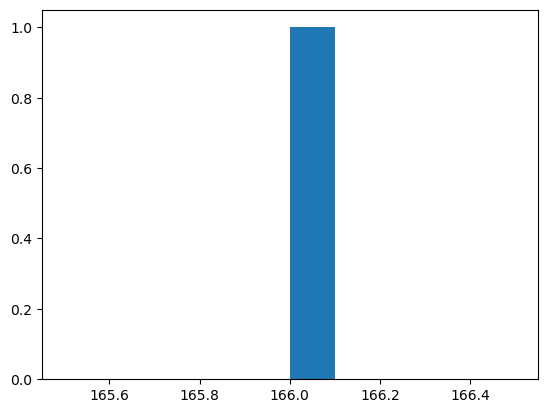

In [95]:
x=[len(c) for c in nx.connected_components(C_wpg)]
plt.hist(x)

This tells us that our graph has single component of around 166. This tell us that all the nodes are connected together.

Below we will utilize the `island_method` to reduce the complexity of the graph and give us different connected components based on different weights or strength of co-occurance of characters between scenes/chapters.



In [96]:
# SNA function for trimming edges
def trim_edges(g, weight=1):
    g2 = nx.Graph()
    edges = []

    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            edges.append([f, to, edata['weight']])
        
    g2.add_weighted_edges_from(edges)
    return g2

# SNA function for island method
def island_method(g, iterations = 5):
    weights = [edata['weight'] for f, to, edata in g.edges(data=True)]

    mn = int(min(weights))
    mx = int(max(weights))
    step = int((mx-mn)/iterations)

    return[[threshold, trim_edges(g, threshold)] for threshold in range(mn, mx, step)]

In [97]:
character_islands = island_method(C_wpg)

for i in character_islands:
    print(i[0], nx.number_of_nodes(i[1]), nx.number_connected_components(i[1]))

1 111 1
29 8 1
57 3 1
85 3 1
113 3 1
141 2 1


The `island_method` function generated islands of give five different weights. These represent the relationship between characters based on the number of chapters they share. So for ex, the first line tells us there are 111 characters that have atleast one character connection in a chapter and forms a single connected component.Below we will see the characters that meet each threshold.

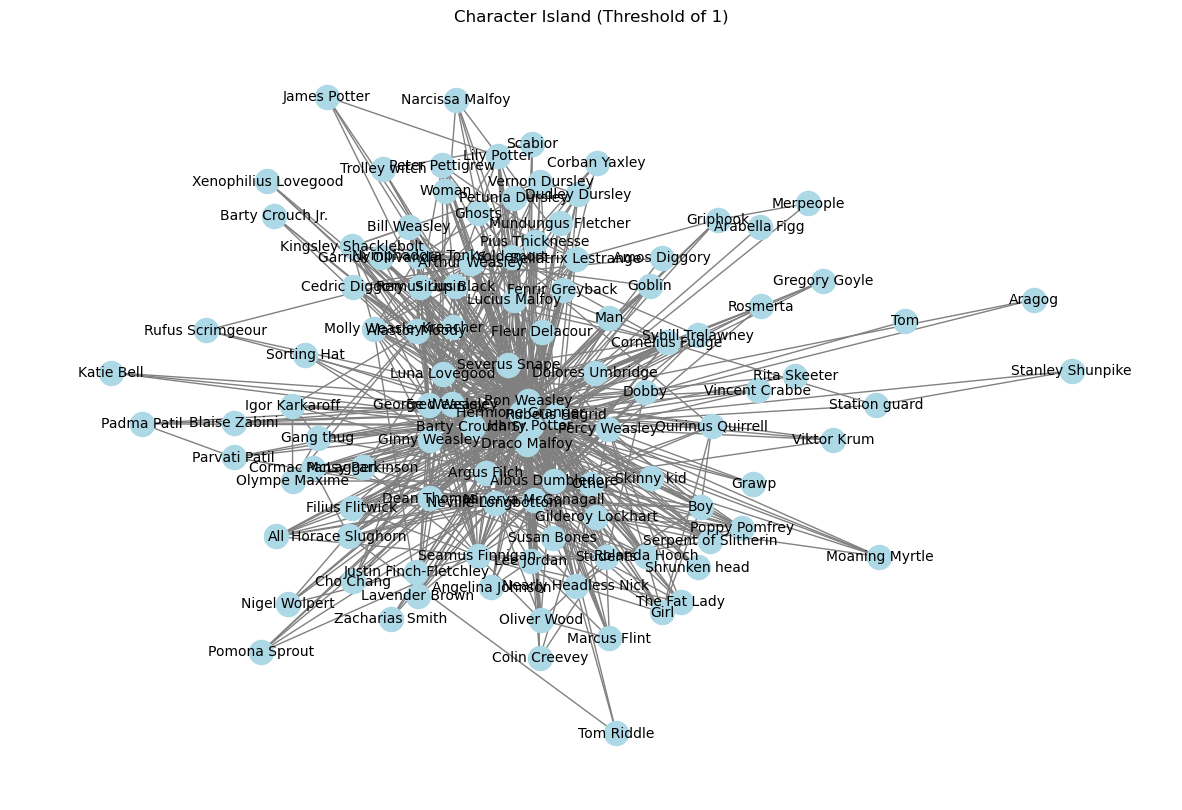

In [115]:
plt.figure(figsize=(15,10))

nx.draw_networkx(character_islands[0][1], pos, node_size=300, font_size=10, node_color='lightblue', edge_color='grey')

plt.title("Character Island (Threshold of 1)")
plt.axis("off")
plt.show()

Here we can see characters that have atleast one character connection.

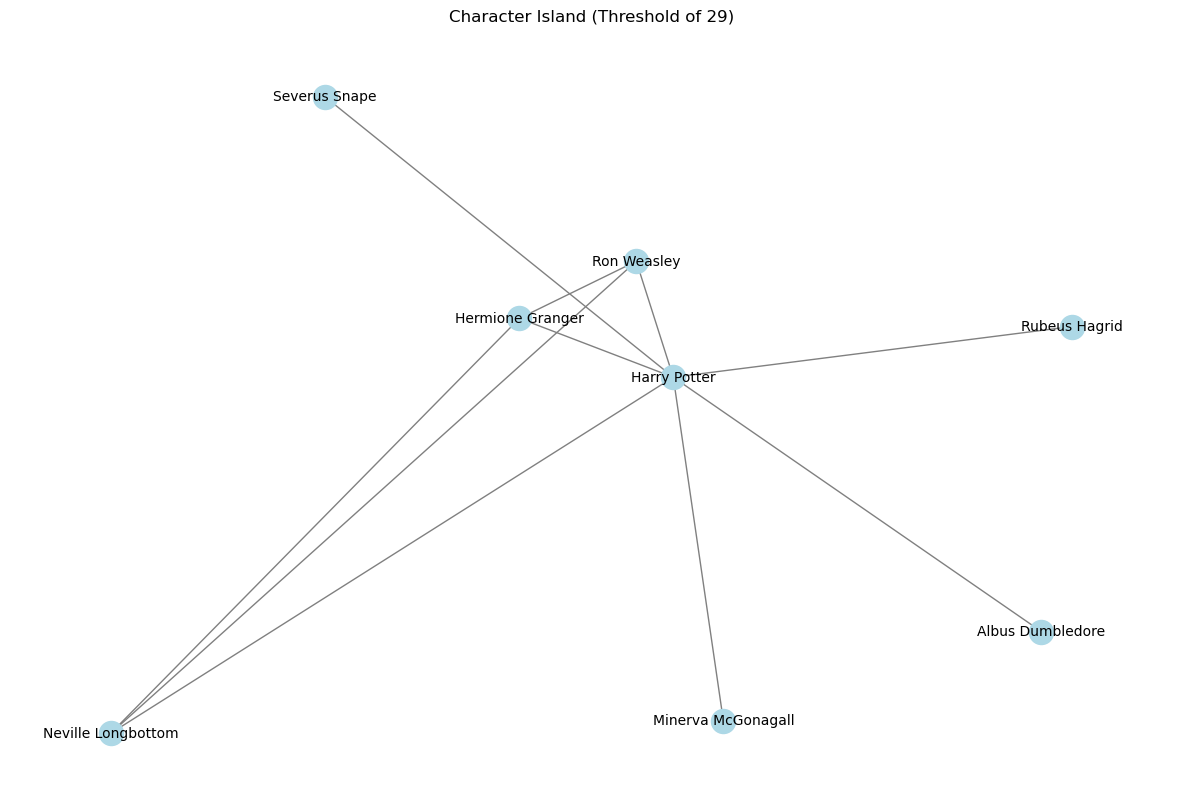

In [120]:
plt.figure(figsize=(15,10))

nx.draw_networkx(character_islands[1][1], pos, node_size=300, font_size=10, node_color='lightblue', edge_color='grey')

plt.title("Character Island (Threshold of 29)")
plt.axis("off")
plt.show()

In the threshold of 29 shared chapters, we can see **Harry**, **Ron**, and **Hermoine** at the center, alongside other supporting instructors at the school like **Dumbledore** and **Prof McGonagall**. We can also see their classmate **Neville Longbottom** in the chart.

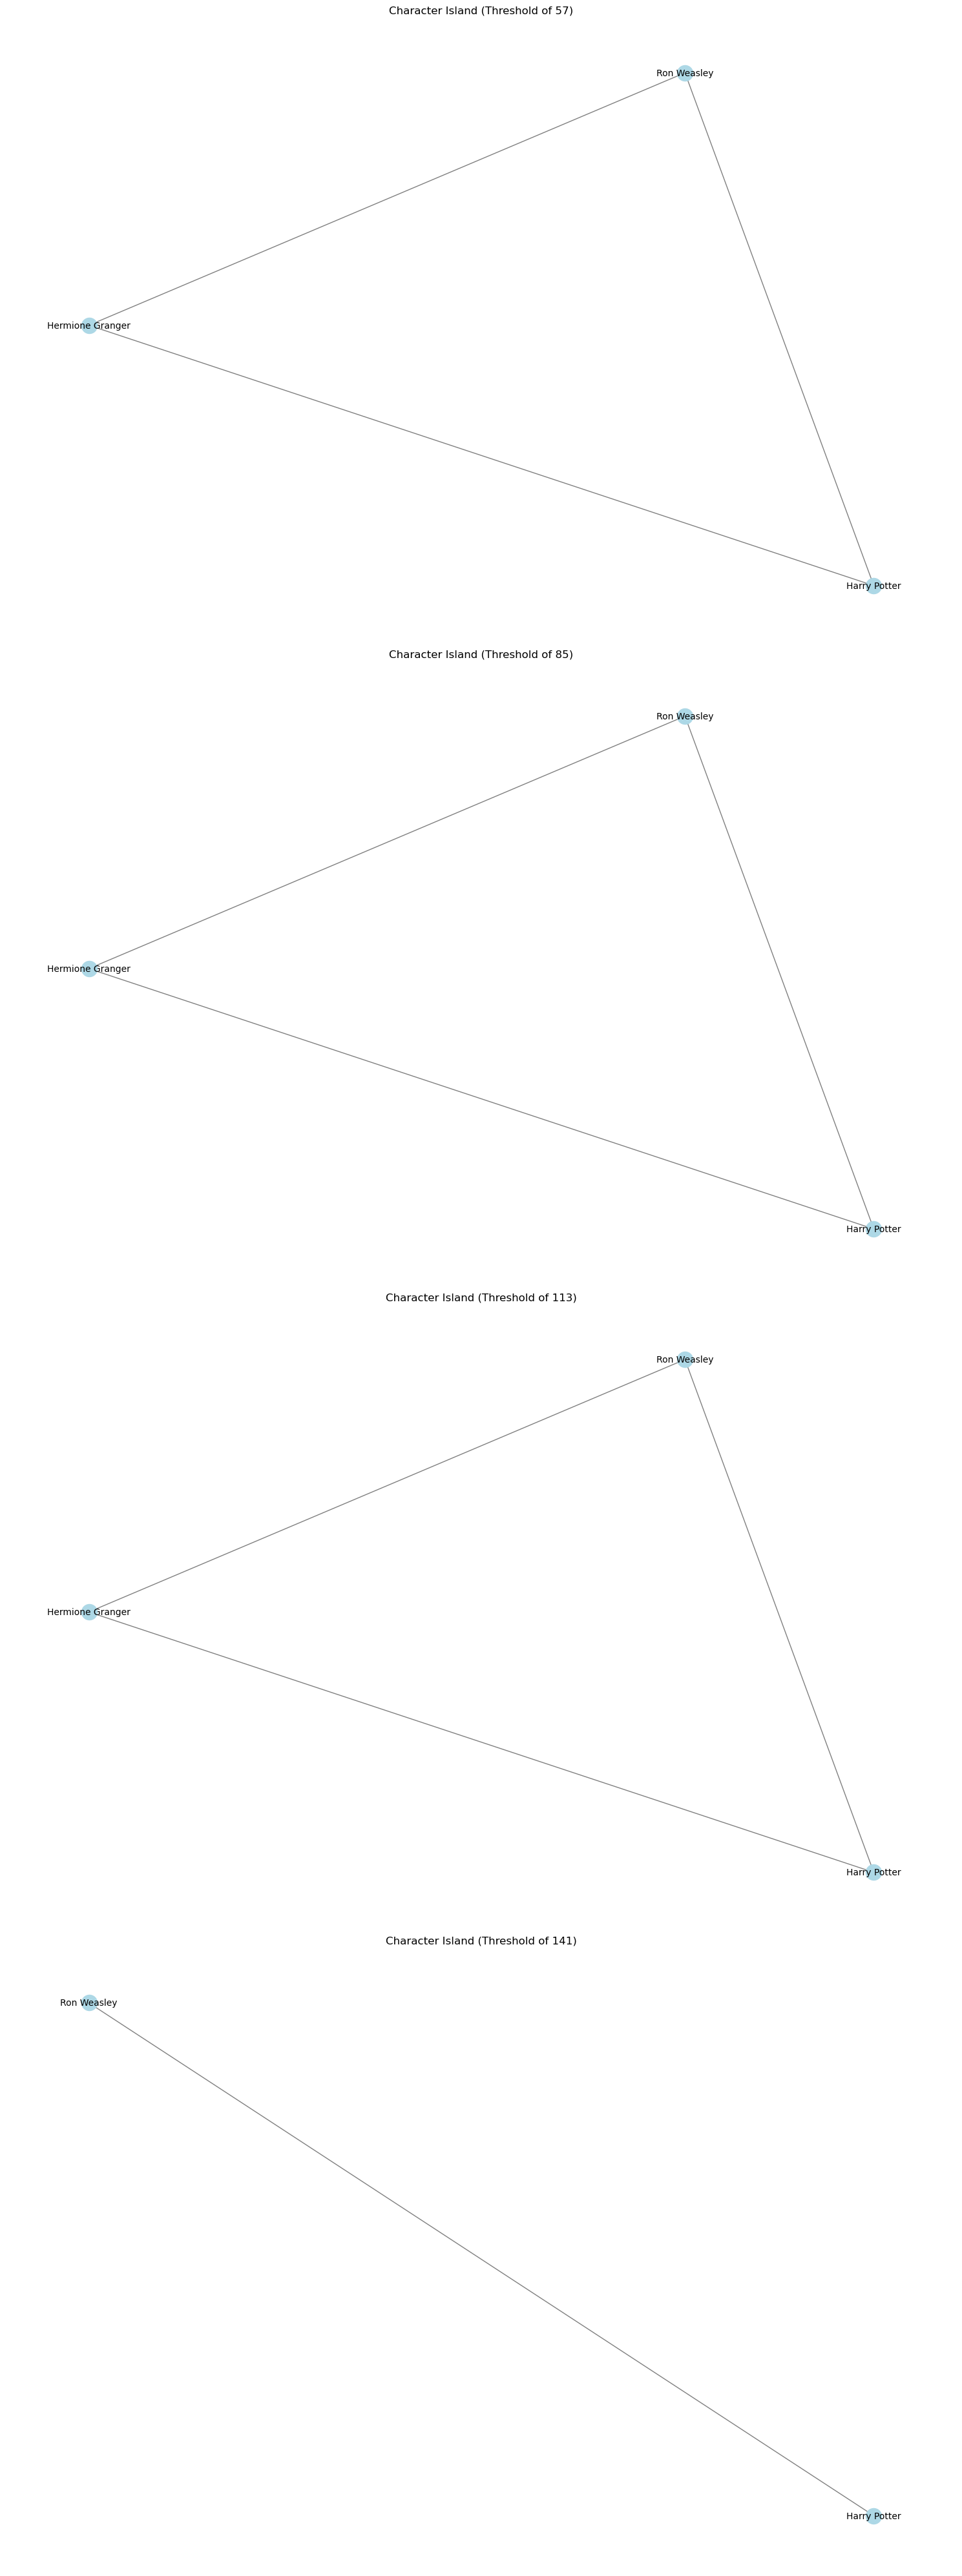

In [121]:
fig, axes = plt.subplots(nrows=4, figsize=(15, 40))

islands_to_print = [2, 3, 4, 5]  # Islands to be printed

for i, ax in enumerate(axes):
    island_idx = islands_to_print[i]
    island, graph = character_islands[island_idx]
    
    nx.draw_networkx(graph, pos, node_size=300, font_size=10, node_color='lightblue', edge_color='grey', ax=ax)
    ax.set_title(f"Character Island (Threshold of {island})")
    ax.axis("off")

plt.tight_layout()
plt.show()

In the final island threshold of 57, 85, 113 and 141 we can see the dynamic trio of **Harry**, **Ron** and **Hermoine** in most of them.

In [102]:
# function where you enter a graph and it creates a dataframe of centrality
def centrality(graph):
    # calculate each of the values for each node
    degree = nx.degree(graph)
    degree_weighted = nx.degree(graph, weight = 'weight')
    degree_c = nx.degree_centrality(graph)
    between_c = nx.betweenness_centrality(graph)
    closeness_c = nx.closeness_centrality(graph)
    eigen_c = nx.eigenvector_centrality(graph, weight = 'weight') 

    # create a list for each node with all the data points
    data = [[name
             , degree[name]
             , degree_weighted[name]
             , round(degree_c[name], 3)
             , round(between_c[name], 3)
             , round(closeness_c[name], 3)
             , round(eigen_c[name], 3)] 
             for name in graph.nodes()]
    
    # turn this into a dataframe
    centrality_df = pd.DataFrame(data
                                 , columns = ['name', 'degree', 'weighted_degree', 'degree centrality'
                                              , 'betweenness', 'closeness', 'eigenvector'])
    
    # return the dataframe
    return centrality_df

centrality(C_wpg).sort_values(by = ['degree', 'eigenvector'], ascending = False)

name  degree  weighted_degree  degree centrality  \
23         Harry Potter     161             1173              0.976   
89          Ron Weasley     142              915              0.861   
22     Hermione Granger     140              867              0.848   
117  Neville Longbottom      86              313              0.521   
152       Rubeus Hagrid      74              270              0.448   
..                  ...     ...              ...                ...   
65         Albus Potter       2                2              0.012   
128     Whomping Willow       2                2              0.012   
163    Bathilda Bagshot       2                2              0.012   
40               Wizard       1                1              0.006   
42     Helena Ravenclaw       1                1              0.006   

     betweenness  closeness  eigenvector  
23         0.281      0.976        0.527  
89         0.144      0.878        0.485  
22         0.137      0.868        0.467  
117        0.030      0.676        0.173  
152        0.024      0.645        0.162  
..           ...        ...          ...  
65         0.000      0.500        0.003  
128        0.000      0.500        0.003  
163        0.000      0.500        0.003  
40         0.000      0.495        0.001  
42         0.000      0.495        0.001  

[166 rows x 7 columns]

The `centrality` function creates a dataframe which contains various centrality measure including some of that we saw before:
- `name`: This is the name of the node or character
- `degree`: The number of unique characters that the person has shared a chapter with
- `weight_degree`: The total chapters that a character shares with other characters
- `degree centrality`The proportion of other characters a character shares at least a chapter with
- `betweenness`: The extended to which a character connects other characters who do not share chapters directly
- `closeness`: How close a character is to all other characters in terms of shared chapters
- `eigenvector`: This tell us the influence a character has based on who they connect with

**Harry** scores the highest in all the measures. He shared shares chapters with almost all the characters in the movies, shares a large number of chapters, is highly connected with other well-connected characters and serves as a bridge between other characters who do not directly share chapters. **Ron** and **Hermoine** score high similarly. **Neville** and **Hagrid's** has a lower weighted degree, and eigenvector centrality - they are less often a bridge between characters and are not as connected to influential characters. Though they scored lower compared to the trio, they are still score high relative to the other characters 

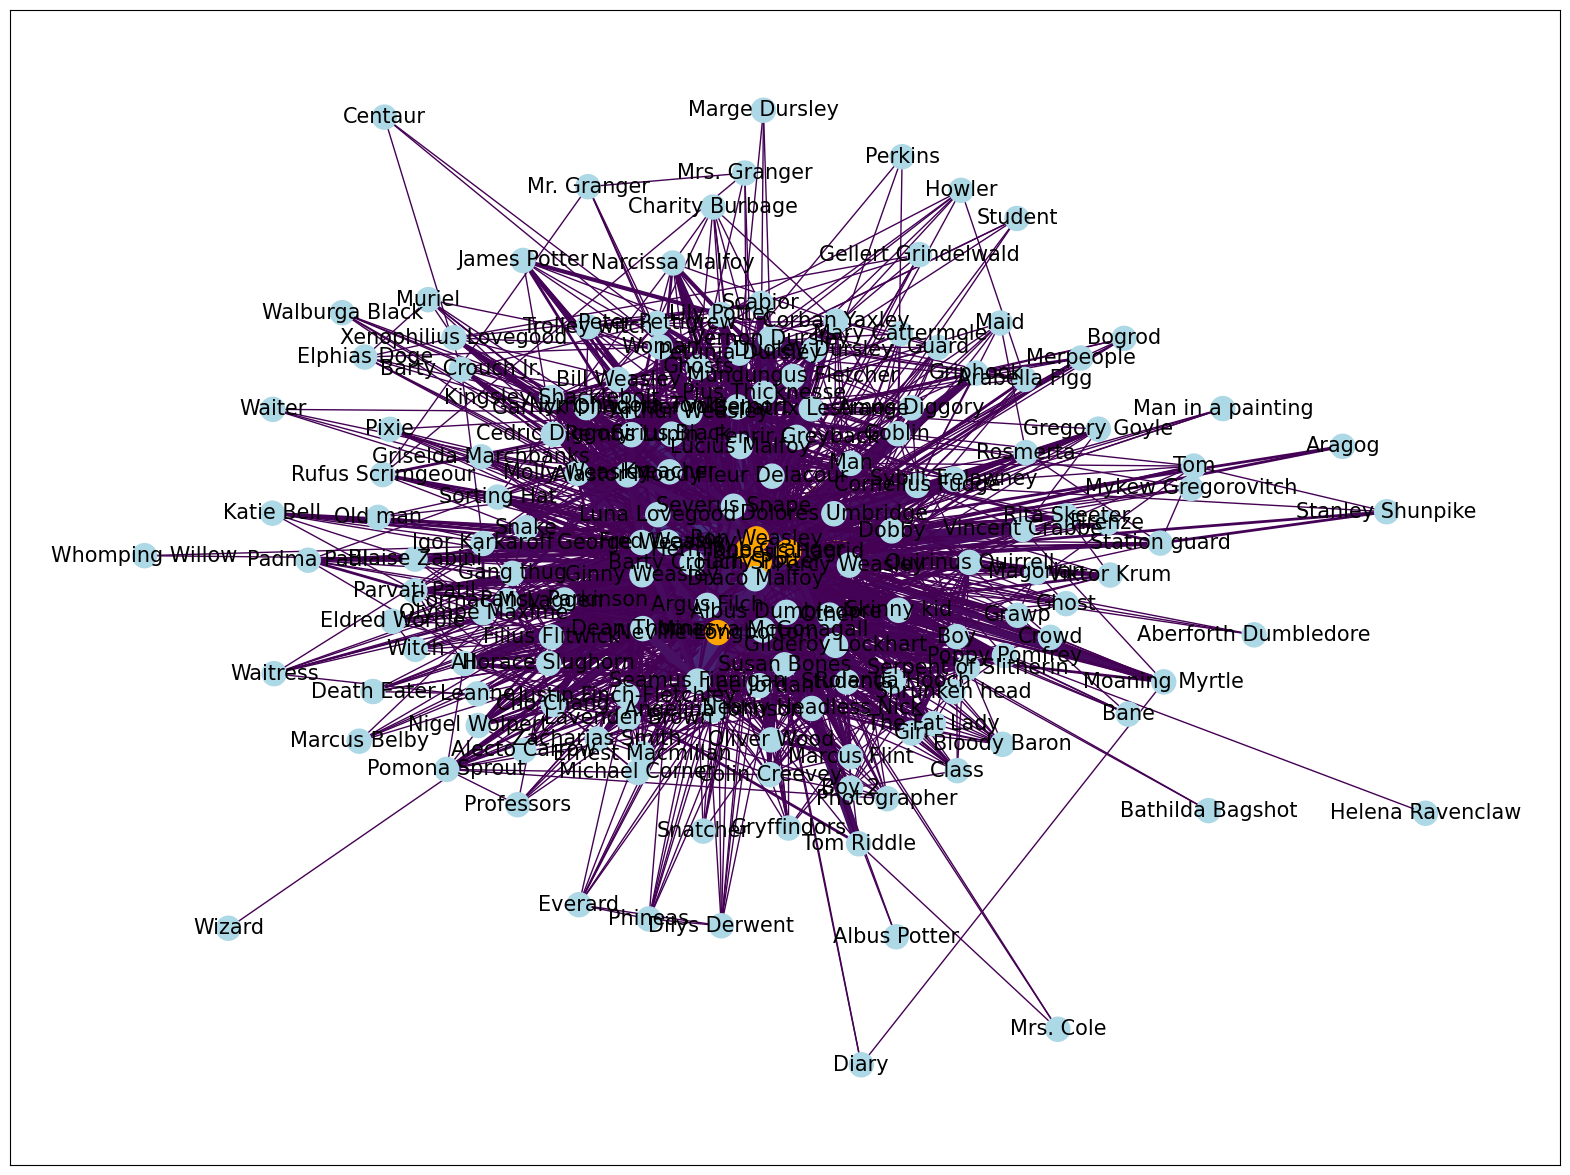

In [127]:
# Project relationships onto the character nodes

# create a list of top five characters
top_five_characters = ['Harry Potter', 'Ron Weasley', 'Hermione Granger', 'Neville Longbottom', 'Rubeus Hagrid']  # replace with your actual top five

# assign colors to anyone on the llist
colors = ['orange' if node in top_five_chayracters else 'lightblue' for node in C_wpg.nodes()]  # replace 'red' and 'lightblue' with your desired colors

plt.figure(figsize = (20, 15))
weights = [edata['weight'] for f, t, edata in C_wpg.edges(data = True)]
charplot = nx.draw_networkx(C_wpg, pos, node_color=colors, width=weights, edge_color=weights, font_size=15)


Here we get an alternative view of our bi-partite graph from earlier. This time instead we are plotting the weighted projected graph `C_wpg`. Each character is represented by the nodes, an edge between nodes in this chart, indicates that the characters share atleast a chapter. The top five characters from the `centrality_df` are highlighted in orange - which we can see in the center of the graph.

(array([1.0945e+04, 6.6290e+03, 6.3600e+03, 1.5840e+03, 4.9900e+02,
        1.3500e+02, 3.6000e+01, 1.2000e+01, 4.0000e+00, 1.0000e+00]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

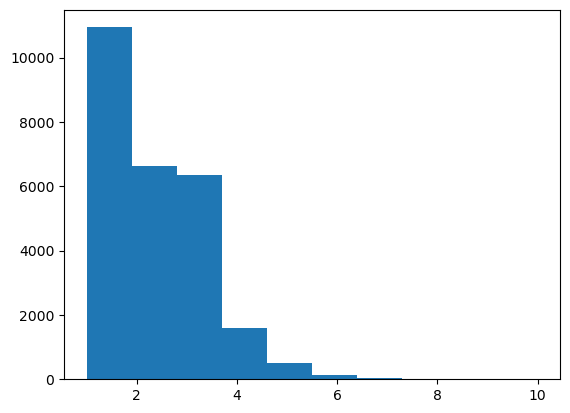

In [122]:
plt.hist(weights)

In this histogram we can see the distribution of the edge weights in our graph. This shows us the amount of scenes shared among characters. We can see that most pairs of characters share between 1 and 3 chapters together.

In [130]:
# function to filter our graph
def filter_graph(G, threshold):
    # initialize new graph
    new_graph = nx.Graph()
    # for each edge
    for edge in G.edges(data = True):
        # find the to and from nodes
        f = edge[0]
        to = edge[1]
        # find the weight
        w = edge[2]['weight']
        # if this edge's weight is above or equal to the given threshold
        if w >= threshold:
            # add this edge to the new graph
            new_graph.add_edge(f, to, weight = w)
    # return the new graph comprised of edges that pass our threshold
    return new_graph

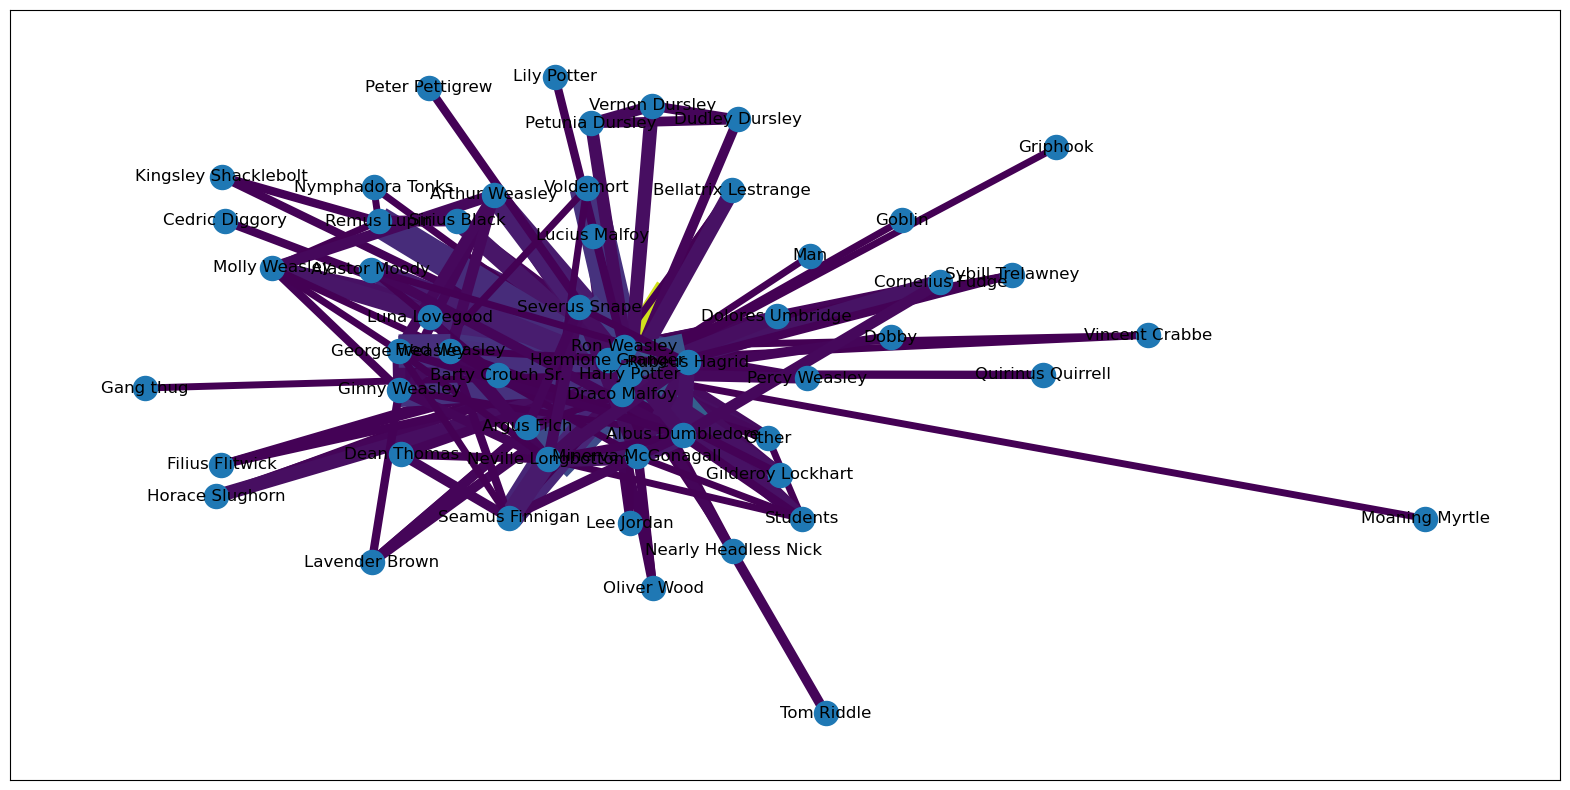

In [135]:
plt.figure(figsize = (20, 10))
filtered = filter_graph(C_wpg, 5)
weights = [edata['weight'] for f, t, edata in filtered.edges(data = True)]
nx.draw_networkx(filtered, pos, width=weights, edge_color = weights)

When we filter for characters that share atleast five chapters together, we see other interesting characters outside of the main protagonists, such as the central villians in the story like **Voldemort**, and **Bellatrix Lestrange**.

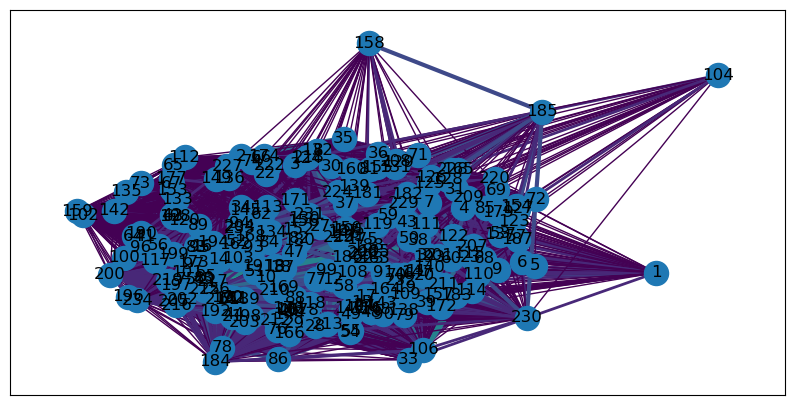

In [129]:
Chap_wpg = bipartite.weighted_projected_graph(B, chapter_nodes)
pos_chap = nx.spring_layout(Chap_wpg, seed=42)  # Compute positions for Chap_wpg
weights_chap = [edata['weight'] for f, t, edata in Chap_wpg.edges(data=True)]  # Compute weights for Chap_wpg

plt.figure(figsize = (10, 5))
nx.draw_networkx(Chap_wpg, pos_chap, width=weights_chap, edge_color=weights_chap)


In [128]:
centrality(Chap_wpg).sort_values(by = ['degree', 'eigenvector'], ascending = False)

name  degree  weighted_degree  degree centrality  betweenness  closeness  \
224   225     233              627              1.000        0.001      1.000   
187   188     232              717              0.996        0.000      0.996   
81     82     232              676              0.996        0.000      0.996   
18     19     232              654              0.996        0.000      0.996   
46     47     232              665              0.996        0.000      0.996   
..    ...     ...              ...                ...          ...        ...   
105   106     166              267              0.712        0.000      0.777   
0       1      94              123              0.403        0.000      0.626   
184   185      70               99              0.300        0.000      0.588   
157   158      41               46              0.176        0.000      0.548   
103   104      33               36              0.142        0.000      0.538   

     eigenvector  
224        0.084  
187        0.098  
81         0.093  
18         0.091  
46         0.091  
..           ...  
105        0.039  
0          0.017  
184        0.011  
157        0.006  
103        0.004  

[234 rows x 7 columns]

The setting of four out of the top five chapters takes place in Hogwarts school. The location and chapters are 255 (The Boathouse - Hogwarts), 82 (Griffindor Commonn Room - Hogwarts), 19 (Great Hall - Hogwarts), and 42 (the Corridors - Hogwarts). It makes sense given that A majority of the characters and important story events are connected to the school. All the locations in the top five have a high degree centrality which means they have share connections in almost all other chapters. The weighted degree vary slightly which means they don't share the same number of characters with other chapters. The eigenvecot values are high which means these chapters are connected to other well-connected chapters.